In [1]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt
import pandas
from datetime import datetime
import pandas as pd

In [2]:
from yahoofinancials import YahooFinancials

In [3]:
def retrieve_stock_data(ticker, start, end):
    json = YahooFinancials(ticker).get_historical_price_data(start, end, 'daily')
    df = pd.DataFrame(columns=['open','close','adjclose'])
    for row in json[ticker]['prices']:
        date = datetime.fromisoformat(row['formatted_date'])
        df.loc[date] = [row['open'], row['close'], row['adjclose']]
    df.index.name = "date"
    return df

start = "2018-01-01"
end   = "2021-01-01"

SISE = retrieve_stock_data("SISE.IS", start, end)
DOGUS = retrieve_stock_data("DOHOL.IS", start, end)
ASELS = retrieve_stock_data("ASELS.IS", start, end)
GARAN = retrieve_stock_data("GARAN.IS", start, end)
BIMAS = retrieve_stock_data("BIMAS.IS", start, end)

In [4]:
dictionary=             { 'SISE': SISE["adjclose"],
                        'DOHOL': DOGUS["adjclose"],
                        'ASELS': ASELS["adjclose"],
                        'GARAN': GARAN["adjclose"],
                        'BIMAS': BIMAS["adjclose"]}    
    


In [5]:
df = pd.DataFrame(      { 'SISE': SISE["adjclose"],
                        'DOHOL': DOGUS["adjclose"],
                        'ASELS': ASELS["adjclose"],
                        'GARAN': GARAN["adjclose"],
                        'BIMAS': BIMAS["adjclose"]})

In [6]:
#dropping missing values
df2=df.dropna() 
a=df2.describe() 
mean = df2.mean()
minimum = df2.min()
maximum = df2.max()
standard_dev = df2.std()
correlation = df2.corr() # Calculating correlation coefficients
variance = df2.var() # Calculating variance
covariancematrix = df2.cov() # Calculating the covariance matrix

In [7]:
describe = pd.DataFrame(  {'mean' : mean,
                          'minimum': minimum,
                          'maximum' : maximum, 
                          'standard_dev' : standard_dev, 
                          'variance' : variance})


print(describe)
print("Correlation Coefficients: \n", correlation)
print("Covariance Matrix: \n",covariancematrix)

            mean    minimum    maximum  standard_dev    variance
SISE    5.107613   3.605928   7.770000      0.867736    0.752966
DOHOL   1.403722   0.628758   3.210000      0.590521    0.348715
ASELS  12.819542   8.164977  19.354355      2.886613    8.332532
GARAN   8.762914   5.720000  12.480000      1.464440    2.144584
BIMAS  44.537350  28.933966  74.512985     12.390898  153.534351
Correlation Coefficients: 
            SISE     DOHOL     ASELS     GARAN     BIMAS
SISE   1.000000  0.647310  0.569413 -0.238119  0.676193
DOHOL  0.647310  1.000000  0.510671 -0.032419  0.917793
ASELS  0.569413  0.510671  1.000000 -0.154693  0.586931
GARAN -0.238119 -0.032419 -0.154693  1.000000 -0.155614
BIMAS  0.676193  0.917793  0.586931 -0.155614  1.000000
Covariance Matrix: 
            SISE     DOHOL      ASELS     GARAN       BIMAS
SISE   0.752966  0.331692   1.426277 -0.302589    7.270446
DOHOL  0.331692  0.348715   0.870493 -0.028036    6.715567
ASELS  1.426277  0.870493   8.332532 -0.653929  

In [8]:
# DOHOL IS THE MOST STABLE STOCK BECAUSE DOHOL HAS THE LOWEST VARIANCE;
    #WHERE THE BIMAS IS THE MOST VOLATILE STOCK WITH IT'S SIGNIFICANTLY HIGHEST
    #VARIANCE.
    
    #DOHOL HAS THE LOWEST MEAN WHICH TELLS US THE STOCK PRICE OF DOHOL WAS THE
    #CHEAPEST ONE AS AVERAGE COST TO BUY IN THE SELECTED DATES.
    
    #BIMAS HAS THE HIGHEST MEAN WHICH THELLS US THE STOCK PRICE OF BIMAS WAS THE
    #MOST EXPENSIVE ONE AS AVERAGE COST TO BUY IN THE SELECTED DATES.
    
    #DOHOL AND BIMAS HAS THE HIGHEST CORRELATION COEFFICIENT AMONG THE 5 FIRMS.
        
    #GARAN AND SISE HAS THE HIGHEST NEGATIVE CORRELATION COEFFICIENT.

In [9]:
#q2

In [10]:
import numpy as np
import warnings
import pandas as pd
import statsmodels.api as sm
import  matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')


In [13]:
warnings.filterwarnings("ignore")
data = pd.read_excel('BrentOil.xls')
df= data.set_index('Date')
df.index

DatetimeIndex(['2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [14]:
df.size

df_train = df[1:18]
df_test = df[18:21]

In [15]:
from statsmodels.tsa.ar_model import AR

mod=sm.tsa.statespace.SARIMAX(df_train,trend='n',order=(1,1,0),seasonal_order=(0,0,0,0),enforce_stationarity=True, enforce_invertibility=True)
mod=sm.tsa.statespace.SARIMAX(df_train,trend='n',order=(1,1,0),seasonal_order=(0,0,0,0))

In [16]:
results=mod.fit(disp=False)
print(results.summary())
modAR1_aic=results.aic
modAR1_bic=results.bic

                               SARIMAX Results                                
Dep. Variable:               PriceOil   No. Observations:                   17
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -53.071
Date:                Sat, 13 Feb 2021   AIC                            110.143
Time:                        16:31:25   BIC                            111.688
Sample:                    04-01-2015   HQIC                           110.222
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2390      0.317      0.754      0.451      -0.383       0.861
sigma2        44.3606     21.701      2.044      0.041       1.827      86.895
Ljung-Box (L1) (Q):                   0.02   Jarque-

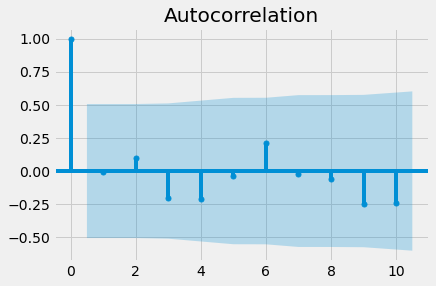

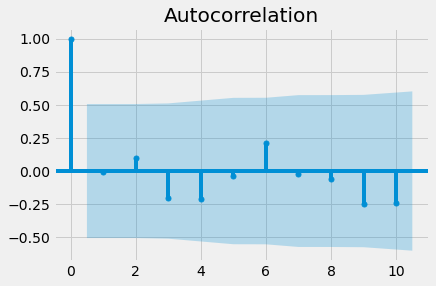

In [17]:
residuals=results.resid
residuals=residuals.iloc[1:-1]
plot_acf(residuals,lags=10)

In [29]:
pred0=results.get_prediction(start=pd.to_datetime('2019-06-01'),end=pd.to_datetime('2020-06-01'), dynamic=True)
pred_pseudo0=pred0.predicted_mean

In [45]:
pred_pseudo=pred.predicted_mean
mae1=abs(df_test-pred_pseudo).mean()

mape1=100*(abs(df_test-pred_pseudo)/df_test).mean()

rmse = np.mean((pred_pseudo - df_test)**2)**.5 
fitted_values=results.fittedvalues

mape1


2019-01-01 00:00:00   NaN
2019-04-01 00:00:00   NaN
2019-07-01 00:00:00   NaN
2019-10-01 00:00:00   NaN
2020-01-01 00:00:00   NaN
PriceOil              NaN
dtype: float64

In [39]:
mod2=sm.tsa.statespace.SARIMAX(df_train,trend='n',order=(2,1,0),seasonal_order=(0,0,0,0),enforce_stationarity=True, enforce_invertibility=True)
results2=mod2.fit(disp=False)
print(results2.summary())


                               SARIMAX Results                                
Dep. Variable:               PriceOil   No. Observations:                   17
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 -53.070
Date:                Sat, 13 Feb 2021   AIC                            112.140
Time:                        18:03:19   BIC                            114.458
Sample:                    04-01-2015   HQIC                           112.259
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2416      0.386      0.626      0.531      -0.515       0.998
ar.L2         -0.0144      0.339     -0.042      0.966      -0.679       0.650
sigma2        44.3522     22.152      2.002      0.0

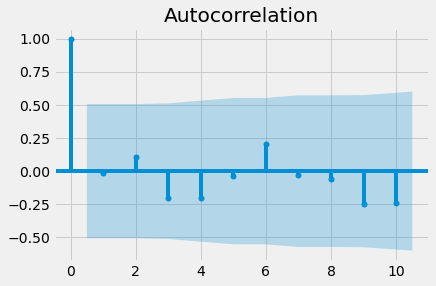

In [47]:
residuals2=results2.resid
residuals2=residuals2.iloc[1:-1]
plot_acf(residuals2,lags=10)
pred2=results2.get_prediction(start=pd.to_datetime('2019-06-01'),end=pd.to_datetime('2020-06-01'), dynamic=True)
pred_pseudo2=pred2.predicted_mean

mape2=100*(abs(df_test-pred_pseudo2)/df_test).mean()

In [48]:
mod3=sm.tsa.statespace.SARIMAX(df_train,trend='n',order=(1,1,1),seasonal_order=(0,0,0,0),enforce_stationarity=True, enforce_invertibility=True)
results3=mod3.fit(disp=False)
print(results3.summary())

                               SARIMAX Results                                
Dep. Variable:               PriceOil   No. Observations:                   17
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -53.071
Date:                Sat, 13 Feb 2021   AIC                            112.142
Time:                        18:04:52   BIC                            114.460
Sample:                    04-01-2015   HQIC                           112.261
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2198      1.242      0.177      0.860      -2.215       2.654
ma.L1          0.0202      1.410      0.014      0.989      -2.743       2.783
sigma2        44.3581     22.099      2.007      0.0

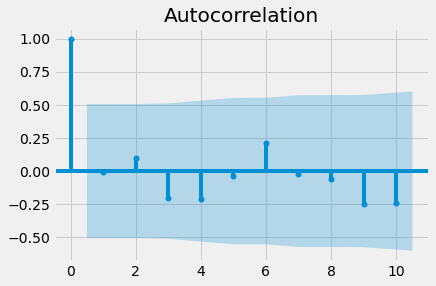

In [49]:
residuals3=results3.resid
residuals3=residuals3.iloc[1:-1]
plot_acf(residuals3,lags=10)
pred3=results3.get_prediction(start=pd.to_datetime('2019-06-01'),end=pd.to_datetime('2020-06-01'), dynamic=True)
pred_pseudo3=pred3.predicted_mean
mae3=abs(df_test-pred_pseudo3).mean() 
mape3=100*(abs(df_test-pred_pseudo3)/df_test).mean()


In [50]:
#model 4 ARMA(2,1)

mod4=sm.tsa.statespace.SARIMAX(df_train,trend='n',order=(2,1,1),seasonal_order=(0,0,0,0),enforce_stationarity=True, enforce_invertibility=True)
results4=mod4.fit(disp=False)
print(results4.summary())

                               SARIMAX Results                                
Dep. Variable:               PriceOil   No. Observations:                   17
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 -52.902
Date:                Sat, 13 Feb 2021   AIC                            113.803
Time:                        18:05:16   BIC                            116.893
Sample:                    04-01-2015   HQIC                           113.961
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7233      0.613     -1.179      0.238      -1.925       0.479
ar.L2          0.2766      0.324      0.855      0.393      -0.358       0.911
ma.L1          0.9955      6.800      0.146      0.8

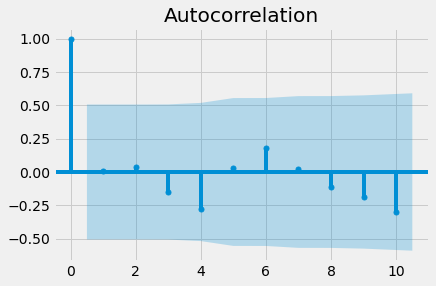

In [56]:
residuals4=results4.resid
residuals4=residuals4.iloc[1:-1]
plot_acf(residuals4,lags=10)                                         
pred4=results4.get_prediction(start=pd.to_datetime('2019-06-01'),end=pd.to_datetime('2020-06-01'), dynamic=True)
pred_pseudo4=pred4.predicted_mean

mape4=100*(abs(df_test-pred_pseudo4)/df_test).mean()

In [53]:
mod5=sm.tsa.statespace.SARIMAX(df_train,trend='n',order=(3,1,1),seasonal_order=(0,0,0,0),enforce_stationarity=True, enforce_invertibility=True)
results5=mod5.fit(disp=False)
print(results5.summary())

                               SARIMAX Results                                
Dep. Variable:               PriceOil   No. Observations:                   17
Model:               SARIMAX(3, 1, 1)   Log Likelihood                 -52.521
Date:                Sat, 13 Feb 2021   AIC                            115.043
Time:                        18:05:56   BIC                            118.906
Sample:                    04-01-2015   HQIC                           115.240
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4253      1.006      0.423      0.672      -1.546       2.396
ar.L2         -0.0390      0.392     -0.099      0.921      -0.807       0.729
ar.L3         -0.2794      0.351     -0.797      0.4

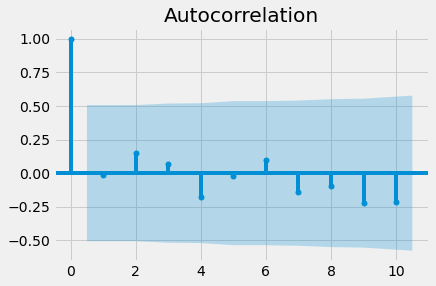

In [58]:
residuals5=results5.resid
residuals5=residuals5.iloc[1:-1]
plot_acf(residuals5,lags=10)                                         
pred5=results5.get_prediction(start=pd.to_datetime('2019-06-01'),end=pd.to_datetime('2020-06-01'), dynamic=True)
pred_pseudo5=pred5.predicted_mean

mape5=100*(abs(df_test-pred_pseudo5)/df_test).mean()

In [55]:
mod6=sm.tsa.statespace.SARIMAX(df_train,trend='n',order=(4,1,1),seasonal_order=(0,0,0,0),enforce_stationarity=True, 
                                  enforce_invertibility=True)
results6=mod6.fit(disp=False)
print(results6.summary())

                               SARIMAX Results                                
Dep. Variable:               PriceOil   No. Observations:                   17
Model:               SARIMAX(4, 1, 1)   Log Likelihood                 -52.295
Date:                Sat, 13 Feb 2021   AIC                            116.589
Time:                        18:06:18   BIC                            121.225
Sample:                    04-01-2015   HQIC                           116.826
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0212      2.408      0.009      0.993      -4.699       4.742
ar.L2          0.0550      0.538      0.102      0.919      -1.000       1.110
ar.L3         -0.2038      0.511     -0.398      0.6

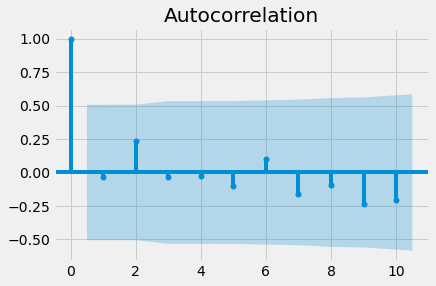

In [59]:
residuals6=results6.resid
residuals6=residuals6.iloc[1:-1]
plot_acf(residuals6,lags=10)   
pred6=results6.get_prediction(start=pd.to_datetime('2019-06-01'),end=pd.to_datetime('2020-06-01'), dynamic=True)
pred_pseudo6=pred6.predicted_mean

mape6=100*(abs(df_test-pred_pseudo6)/df_test).mean()

In [60]:
tpred_real=results3.get_prediction(start=pd.to_datetime('2019-06-01'),end=pd.to_datetime('2020-06-01'), dynamic=True,)
pred_ci=tpred_real.conf_int() # confidence interval
pred_real=tpred_real.predicted_mean


<AxesSubplot:xlabel='Date'>

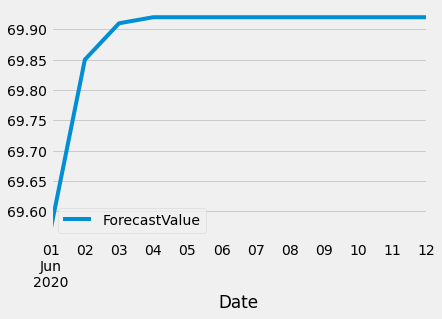

In [62]:
SARIMAX_forecast = round(results3.forecast(steps =12 ), 2)
idx = pd.date_range('2020-06-01', '2023-06-01')
SARIMAX_forecast = pd.DataFrame(list(zip(list(idx),list(SARIMAX_forecast))), 
                                columns=['Date','ForecastValue']).set_index('Date')
SARIMAX_forecast .plot()


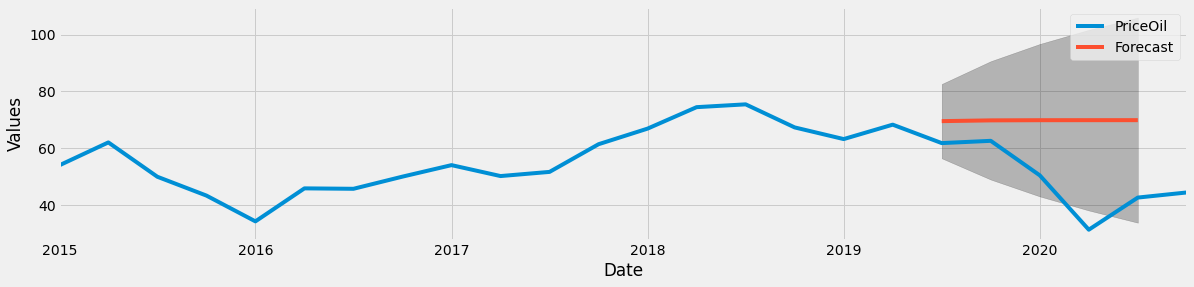

In [63]:
ax = df.plot(label='observed', figsize=(18, 4))
pred_real.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.show()